# **7. Manipulación simple de señales**

<p align = "justify"><b>Alcance: </b> Se definen las señales singulares y su implementación mediante el módulo <i>SymPy</i>.

## **7.1. Operaciones elementales**

<p align = "justify">Las operaciones como la superposición, el cambio temporal y el escalamiento, se utilizan para construir señales con una estructura más compleja. Se introduce un conjunto de operaciones elementales que se utilizan frecuentemente en el procesamiento de señales.

### **7.1.1. Superposición**

<p align = "justify">La superposición $x(t)$ de dos señales $x_1(t)$ and $x_2(t)$ está dada por:

\begin{equation}
x(t) = A \cdot x_1(t) + B \cdot x_2(t) \tag{7.1}
\end{equation}

con los pesos complejos $A, B \in \mathbb{C}$.

<p align = "justify"><b><h4>Ejemplo 7.1: <h4\></b>El siguiente ejemplo ilustra la superposición de dos señales armónicas $x(t) = A \cdot \cos(\omega_1 t) + B \cdot \cos(\omega_2 t)$ con pesos $A$, $B$ y frecuencia angular $\omega_1$ y $\omega_2$.

Código 7.1: genera la superposición de dos señales sinusoidales.

In [ ]:
import matplotlib.pyplot as plt                                      
import numpy as np
import ipywidgets as ipy
import warnings
warnings.filterwarnings('ignore')                                               #Evita que aparezcan las advertencias a la hora de usar sympy

# Se crea una función para crear gráficos personalizados
def Ax(ax):
                                                       
    ax.spines['left'].set_position(('data',0))                                  #Se ajustan los ejes del grafico
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['top'].set_color('none')
    ax.set_axisbelow(False)

    for i in ax.get_xticklabels() + ax.get_yticklabels():                       #Se configura los parámetros de las etiquetas de los ejess
        i.set_fontsize(15)
        i.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.75 ))
    
    ax.set_xlabel('', fontsize=20)
    ax.set_ylabel('', fontsize=20 ,rotation=0)
    ax.xaxis.set_label_coords(1.0, 0.0, ax.get_yaxis_transform())               #Se ubica los títulos de los ejes
    ax.yaxis.set_label_coords(0.0, 1.0, ax.get_xaxis_transform())                
    return ax  

In [ ]:
plt.rcParams['figure.figsize'] = 15, 8                                          #Se ajusta el tamaño de las figuras
plt.rcParams['lines.linewidth'] = 3                                             #Se ajusta el grosor de las lineas

t1 = np.linspace(-5, 5, 1000)

def widget1(A, B, w1, w2):
    x = A*np.cos(w1*t1) + B*np.cos(w2*t1)
    fig, ax = plt.subplots(1)
    ax = Ax(ax)
    ax.plot(t1, x)
    ax.set_xlabel('$t$')
    ax.set_ylabel('$x(t)$')

display(
    ipy.interactive(
        widget1,
        A=ipy.FloatSlider(
            value=1, min=0, max=15, step=.1,
            continuous_update=False
        ),
        B=ipy.FloatSlider(
            value=1, min=0, max=15, step=.1,
            continuous_update=False
        ),
        w1=ipy.FloatSlider(
            value=1, min=0, max=15, step=.1,
            continuous_update=False
        ),
        w2=ipy.FloatSlider(
            value=1, min=0, max=15, step=.1,
            continuous_update=False
        )
    )
)

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='A', max=15.0), FloatSlider(…

<p align = "center"><b>Tablero 7.1. </b> Superposición de dos señales continuas

<p align = "justify"><b><h4>Ejemplo 7.2: <h4\></b>Dado $x_1(n) = Cos(w_1n)$ y $x_2(n) = Cos(w_2n)$ con $w_1 = 2 \pi f_1$, $w_2 = 2 \pi f_2$, $f_1 = \frac{k_1}{N_1}$ y $f_2 = \frac{k_2}{N_2}$ tal que $k_i,~ N_i \in \mathbb{Z}$, grafique la señal equivalente $y(n)$ que es el resultado de la superposición de las señales $x_1(n)$ y $x_2(n)$.

Código 7.2: genera la superposición de dos señales discretas.

In [ ]:
n1 = np.arange(25)

def widget2(k1, N1, k2, N2):
    f1 , f2 = k1/N1, k2/N2
    x = np.cos(2*np.pi*f1*n1) + np.cos(2*np.pi*f2*n1)
    fig, ax = plt.subplots(1)
    ax = Ax(ax)
    ax.stem(n1, x, use_line_collection=True,                             
                linefmt='grey', markerfmt='ko', 
                basefmt=" ")
    ax.set_xlabel('$n$')
    ax.set_ylabel('$x(n)$')
    ax.set_xlim([0, 26])

display(
    ipy.interactive(
        widget2,
        k1=ipy.IntSlider(
            value=1, min=0, max=15,
            continuous_update=False
        ),
        N1=ipy.IntSlider(
            value=1, min=1, max=15,
            continuous_update=False
        ),
        k2=ipy.IntSlider(
            value=1, min=0, max=15,
            continuous_update=False
        ),
        N2=ipy.IntSlider(
            value=1, min=1, max=15,
            continuous_update=False
        )
    )
)

interactive(children=(IntSlider(value=1, continuous_update=False, description='k1', max=15), IntSlider(value=1…

<p align = "center"><b>Tablero 7.2. </b> Superposición de dos señales discretas

### **7.1.2. Desplazamiento temporal**

<p align = "justify">El desplazamiento temporal de una señal $x(t)$/$x[n]$ en un instante de tiempo $\tau/k$ es una operación frecuentemente aplicada en el procesamiento de señales. Por ejemplo, para modelar la propagación de señales desde un actuador a un sensor. El desplazamiento de la señal $x(t)$ está definido como:

\begin{equation}
y(t) = x(t + \tau) \tag{7.2}
\end{equation}

\begin{equation}
y[n] = x[n + k] \tag{7.3}
\end{equation}

<p align = "justify">con $\tau \in \mathbb{R}$ y $k \in \mathbb{Z}$.


#### **7.1.2.1. Adelanto de una señal**

<p align = "justify">Para la señal $x(t)$, un adelanto en el tiempo se define como:

\begin{equation}
y(t) = x(t+\tau),~ \tau>0 \tag{7.4}
\end{equation}

<p align = "justify">y para una señal discreta $x(n)$, estará dado por:

\begin{equation}
y(n) = x(n+k),~ k>0 \tag{7.5}
\end{equation}

<p align = "justify"><b><h4>Ejemplo 7.3: <h4\></b>Adelantar la señal $x(t)=Sen(\omega t)$ un valor $\theta$.

Código 7.3: adelanta una señal sinusoidal.

In [ ]:
t2 = np.linspace(-10, 10, 1000)

def widget3(theta):
    x = np.sin(t2 + theta)
    fig, ax = plt.subplots(1)
    ax = Ax(ax)
    ax.plot(t2, x)
    ax.set_xlabel('$t$')
    ax.set_ylabel('$x(t)$')

display(ipy.interactive(
    widget3,
    theta=ipy.FloatSlider(
        value=0, min=0, max=15,
        continuous_upgrade=False
    )
))

interactive(children=(FloatSlider(value=0.0, description='theta', max=15.0), Output()), _dom_classes=('widget-…

<p align = "center"><b>Tablero 7.3. </b> Señal sinusoidal adelantada

<p align = "justify"><b><h4>Ejemplo 7.4: <h4\></b>Adelantar la señal $x(n)$ en $k$ unidades.

| x(n): |  0 |  0 | -2 |  0 |  2 | 2 | 3 | 4 | 0 | 0 |
|:----:|:--:|:--:|:--:|:--:|:--:|:-:|:-:|:-:|:-:|:-:|
|   n:  | -5 | -4 | -3 | -2 | -1 | 0 | 1 | 2 | 3 | 4 |





<p align = "center"><b>Tabla 7.1. </b> Señal discreta ejemplo 7.4

Código 7.4: adelanta una señal discreta.

In [ ]:
x2 = [0, 0, -2, 0, 2, 2, 3, 4, 0, 0]
n2 = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]
def widget4(k):

    n = [i-k for i in n2]
    fig, ax = plt.subplots(1)
    ax = Ax(ax)
    ax.stem(n, x2, use_line_collection=True,                                    #Se realiza la gráfica discreta
                    linefmt='grey', markerfmt='ko', 
                    basefmt=" ")
    ax.set_xlabel('$n$')
    ax.set_ylabel('$x(n)$')

display(ipy.interactive(
    widget4,
    k=ipy.IntSlider(
        value=0, min=0, max=4,
        continuous_upgrade=False
    )
))

interactive(children=(IntSlider(value=0, description='k', max=4), Output()), _dom_classes=('widget-interact',)…

<p align = "center"><b>Tablero 7.4. </b> Señal discreta adelantada

#### **7.1.2.2. Atraso de una señal**

<p align = "justify">Para una señal $x(t)$, su atraso esta dado por:

\begin{equation}
y(t) = x(t+\tau),~ \tau<0 \tag{7.6}
\end{equation}

<p align = "justify">y para una señal discreta $x(n)$, estará dado por:

\begin{equation}
y(n) = x(n+k),~ k<0 \tag{7.7}
\end{equation}

<p align = "justify"><b><h4>Ejemplo 7.5: <h4\></b>Atrasar el equivalente a $90^{o}$ la señal $x(t)= 5\cdot Cos(\omega t)$, con $\omega = 2 \pi f$ y $f = 60~Hz$. El módulo de Python <a href = "http://docs.sympy.org/latest/index.html">SymPy</a> es usado para este propósito.

Código 7.5: atrasa una señal sinusoidal.

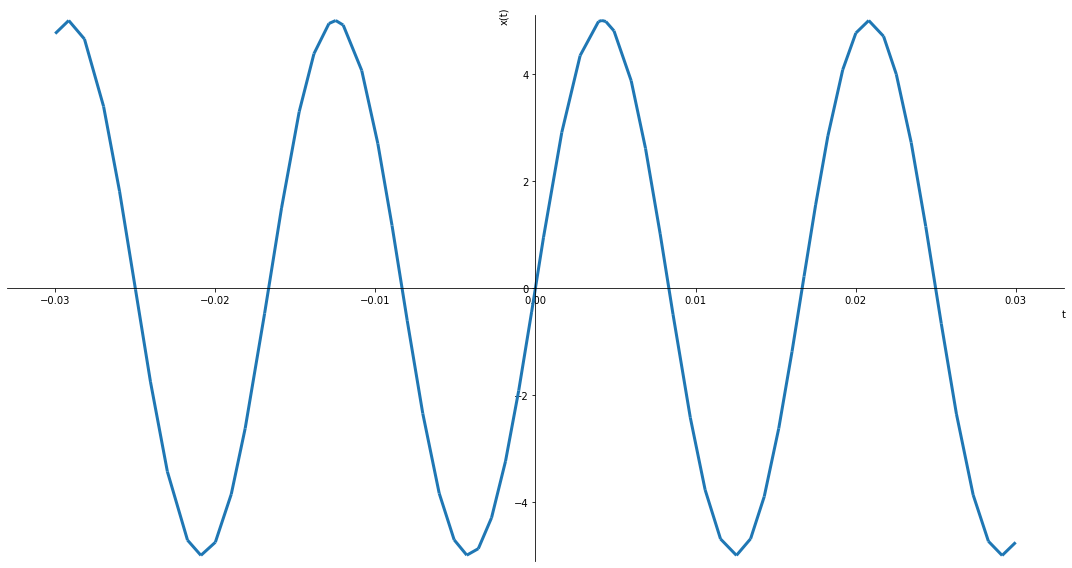

In [ ]:
from sympy import *                                                             #Se importa el modulo SymPy y todas sus clases
init_printing()                                                                 #Se establece el entorno para imprimir ecuaciones

t = symbols('t')                                                                #Se crea la variable simbólica t
tau = -90 * pi / 180
x = 5 * cos(2*pi*60 * t + tau)                                                  #Se delcara la señal

p = plot(x, (t, -.03, .03), ylim=(-5.1, 5.1), ylabel=r'x(t)')                   #Se realiza la gráfica

<p align = "center"><b>Tablero 7.5. </b> Señal sinusoidal atrasada

<p align = "justify"><b><h4>Ejemplo 7.6: <h4\></b>Para ilustrar el cambio temporal de señales, la construcción de una señal escalera por una superposición de desplazamiento se define como:

\begin{equation}
x(t) = \text{rect}\left(t - \frac{1}{2} \right) + \frac{2}{3} \cdot \text{rect}\left(t-\frac{3}{2} \right) + \frac{1}{3} \cdot \text{rect} \left(t-\frac{5}{2} \right) \tag{7.8}
\end{equation}

<p align = "justify">La figura 7.1 ilustra esta señal gráficamente.

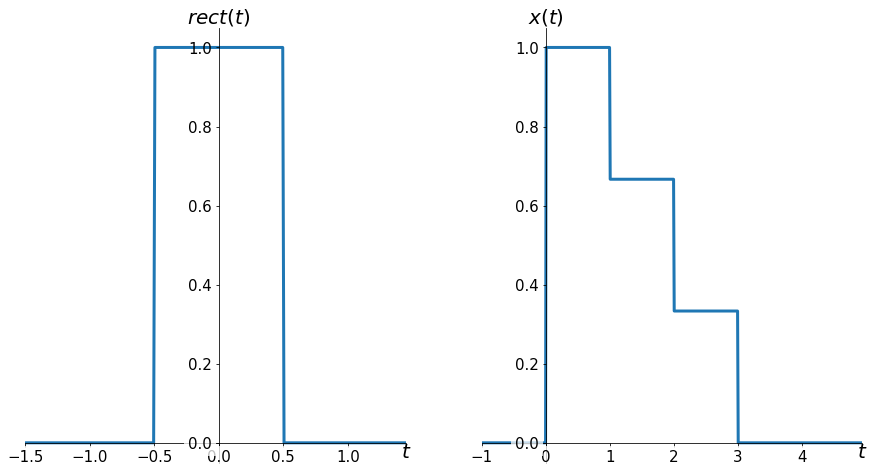

<p align = "center"><b>Figura 7.1. </b> Señal escalera

<p align = "justify">Una modificación en el argumento de una señal, es remplazar la variable independiente $t$ por $-t$ o $n$ por $-n$ para el caso de señales discretas.

<p align = "justify"><b><h4>Ejemplo 7.7: <h4\></b>Para $y(t) = x(-t)$ y $y(n) = x(-n)$, graficar $y(t)$ para las siguientes señales:

* $x(t) = 5\cdot Sen(\omega t)$
* $x(t) = u (t)$
* $x(t) = rect_1(t-4)$

<p align = "justify">Y para $y(n)$ graficar las siguientes señales:

* $x(n) = u(n)$
* $x(n) = rect(n+3)$
* $x(n) = u(n-2)$



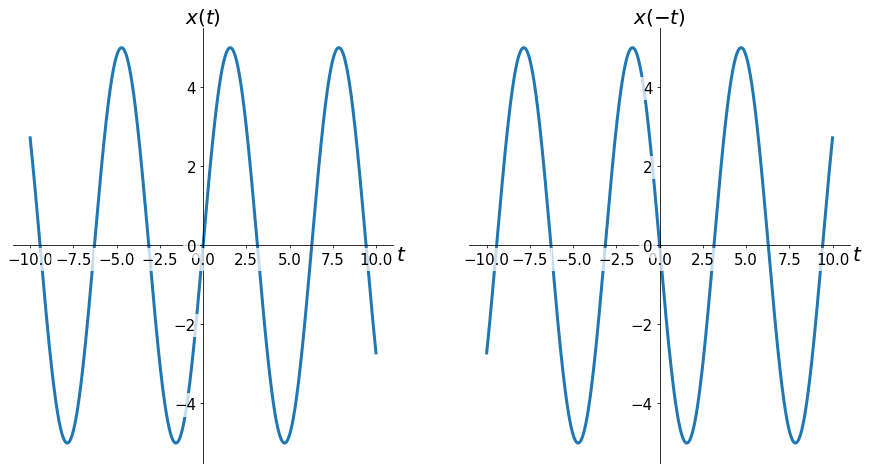

<p align = "center"><b>Figura 7.2. </b> Señal $x(t) = 5sen(t)$ y su inversión

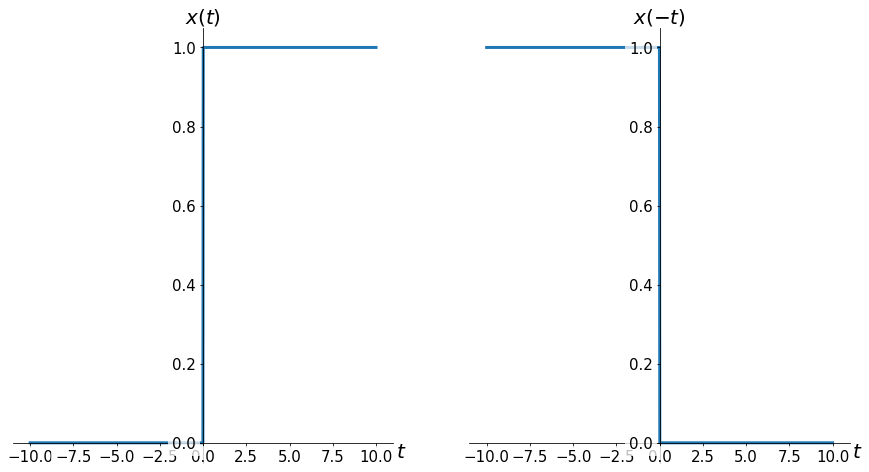

<p align = "center"><b>Figura 7.3. </b> Señal $x(t) = u(t)$ y su inversión

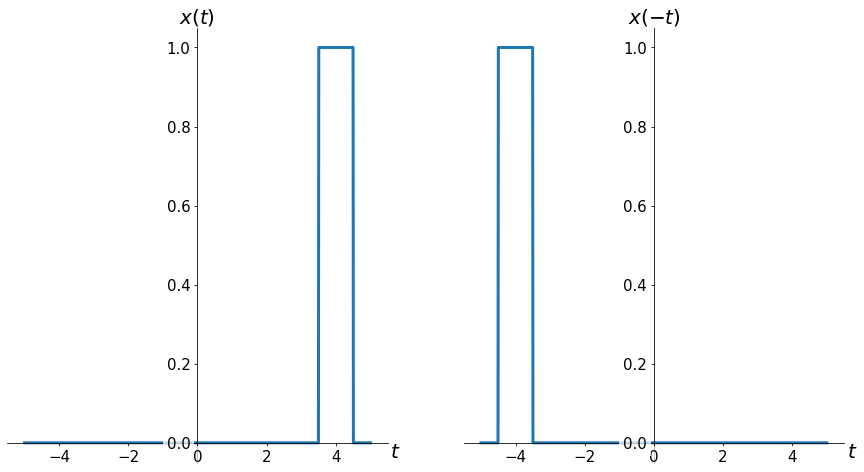

<p align = "center"><b>Figura 7.4. </b> Señal $x(t) = rect_1(t-4)$ y su inversión

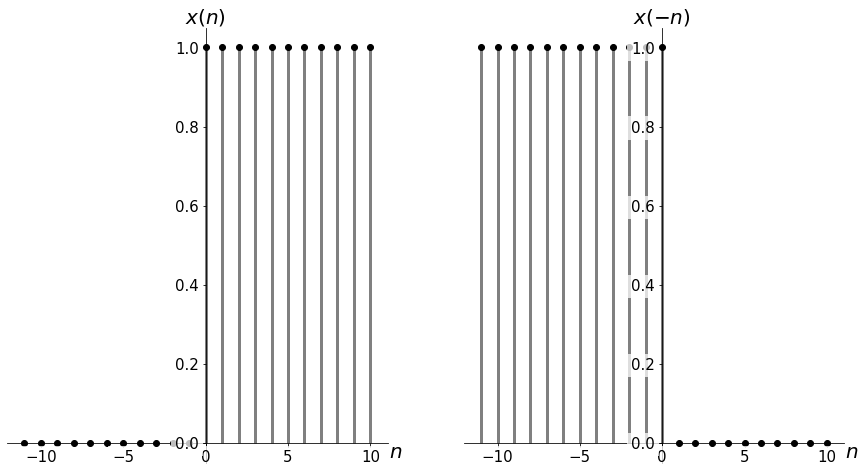

<p align = "center"><b>Figura 7.5. </b> Señal $x(n) = u(n)$ y su inversión

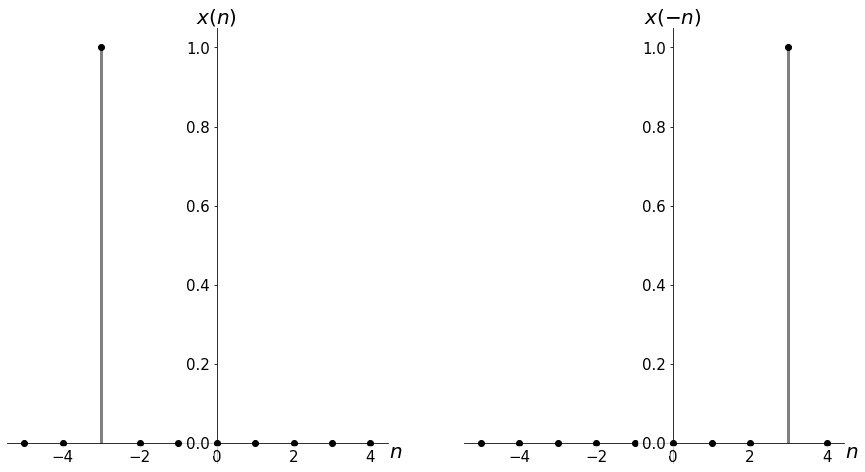

<p align = "center"><b>Figura 7.6. </b> Señal $x(n) = rect_1(n+3)$ y su inversión

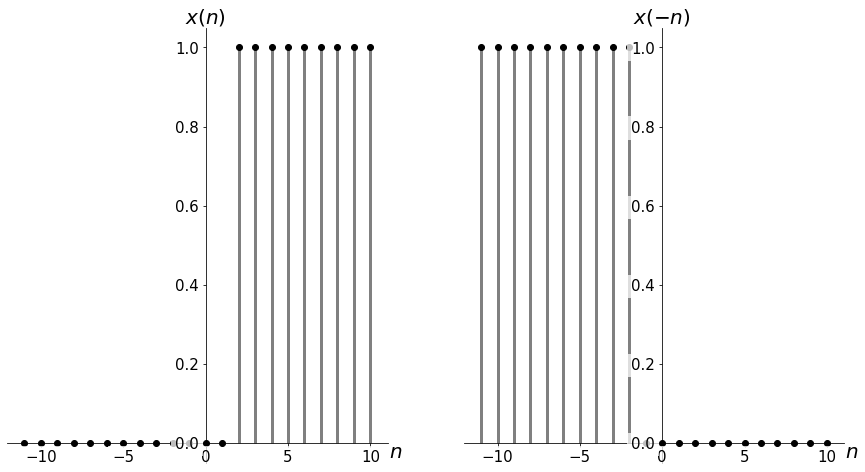

<p align = "center"><b>Figura 7.7. </b> Señal $x(n) = u(n-2)$ y su inversión

### **7.1.3. Adelanto de señales invertidas**

<p align = "justify">Para una señal $x(t) = u(t)$, la señal $y(t)$ estará adelantada en $\tau$ unidades con respecto a $x(-t)$.

\begin{equation}
y(t) = x(-t-\tau) \tag{7.9}
\end{equation}

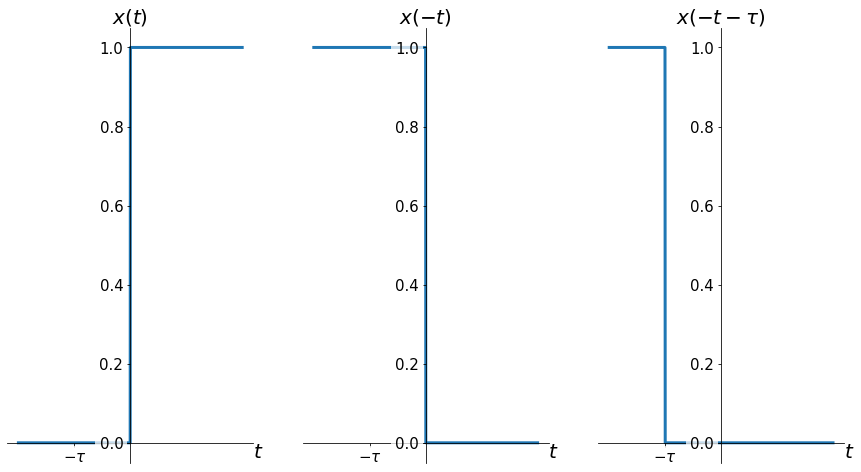

<p align = "center"><b>Figura 7.8. </b> Adelanto de una señal continua invertida

<p align = "justify">Para una señal discreta $x(n) = u(n)$, $y(n)$ estará adelantada $k$ unidades a $x(-n)$.

\begin{equation}
y(n) = x(-n-k) = u(-n-k) \tag{7.10}
\end{equation}

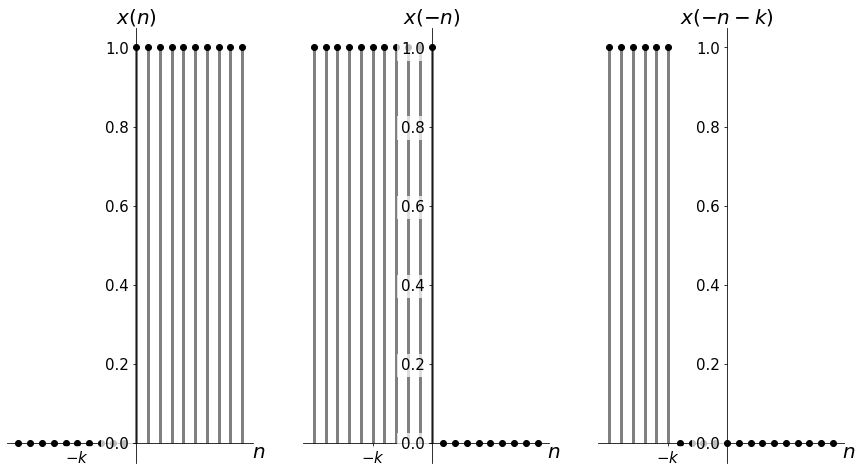

<p align = "center"><b>Figura 7.9. </b> Adelanto de una señal discreta invertida

### **7.1.4. Retraso de una señal invertida**

<p align = "justify">Para una señal $x(t) = u(t)$, la señal $y(t)$ estará atrasada en $\tau$ unidades con respecto a $x(-t)$.

\begin{equation}
y(t) = x(-t+\tau) \tag{7.11}
\end{equation}

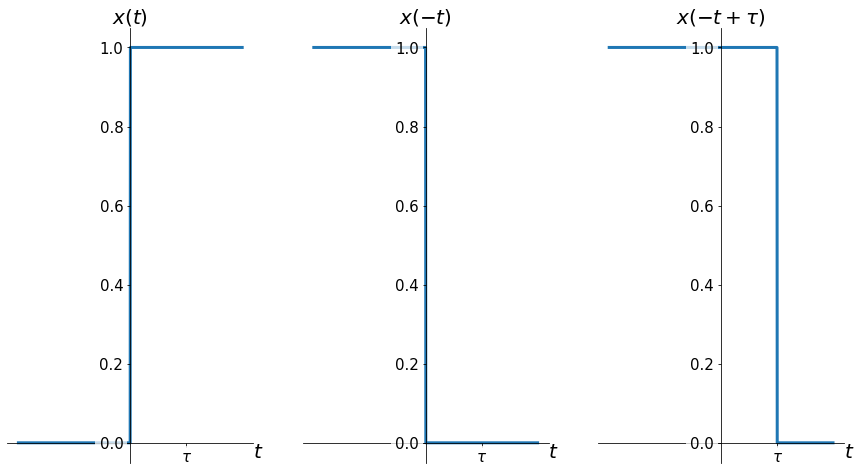

<p align = "center"><b>Figura 7.10. </b> Atraso de una señal continua invertida

<p align = "justify">Para una señal discreta $x(n) = u(n)$, $y(n)$ estará atrasada $k$ unidades a $x(-n)$.

\begin{equation}
y(n) = x(-n+k) = u(-n+k) \tag{7.12}
\end{equation}

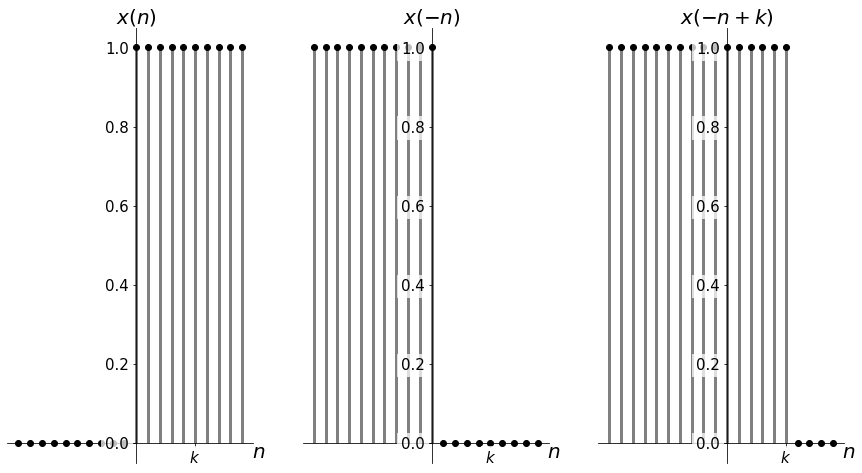

<p align = "center"><b>Figura 7.11. </b> Atraso de una señal discreta invertida

<p align = "justify"><b><h4>Ejemplo 7.8: <h4\></b>El siguiente ejemplo ilustra el cambio temporal $y(t) = x(-t + \tau)$ de la señal escalera $x(t)$ anteriormente introducida. Nuevamente el modulo <i>SymPY</i> es utilizado. Note que la función escalera es expresada en términos de la función Heaviside.

Código 7.6: declara y gráfica la señal escalera.

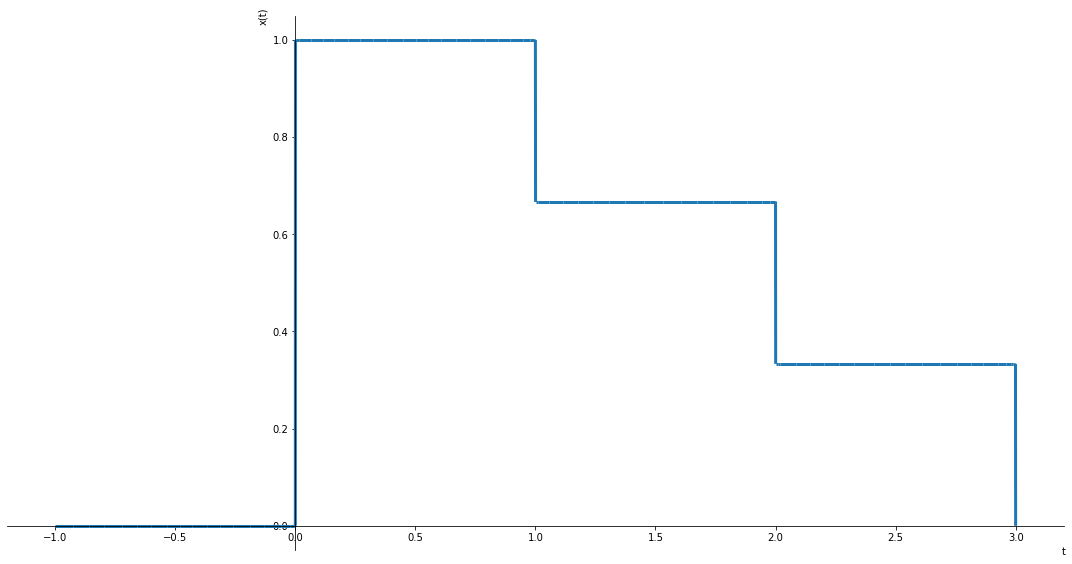

In [ ]:
x = Function('x')(t)                                                            #Se crea una función simbólica
rect = Heaviside(t+1/S(2), 1) - Heaviside(t-1/S(2), 1)                          #Se declara la función rectangular
expr = (rect.subs(t, t-1/S(2)) + 2/S(3)*rect.subs(t, t-3/S(2))                  #Se declara la función escalera
        + 1/S(3)*rect.subs(t, t-5/S(2)))
display(Eq(x, expr))                                                            #Se muestra la ecuación en pantalla
p = plot(expr, (t, -1, 3), ylabel=r'x(t)')                                      #Se realiza la gráfica

<p align = "center"><b>Tablero 7.6. </b> Señal escalera creada con SymPy

<p align = "justify">Para graficar la función $y(t)$ se toma $\tau = 2$

Código 7.7: invierte y atrasa la señal escalera.

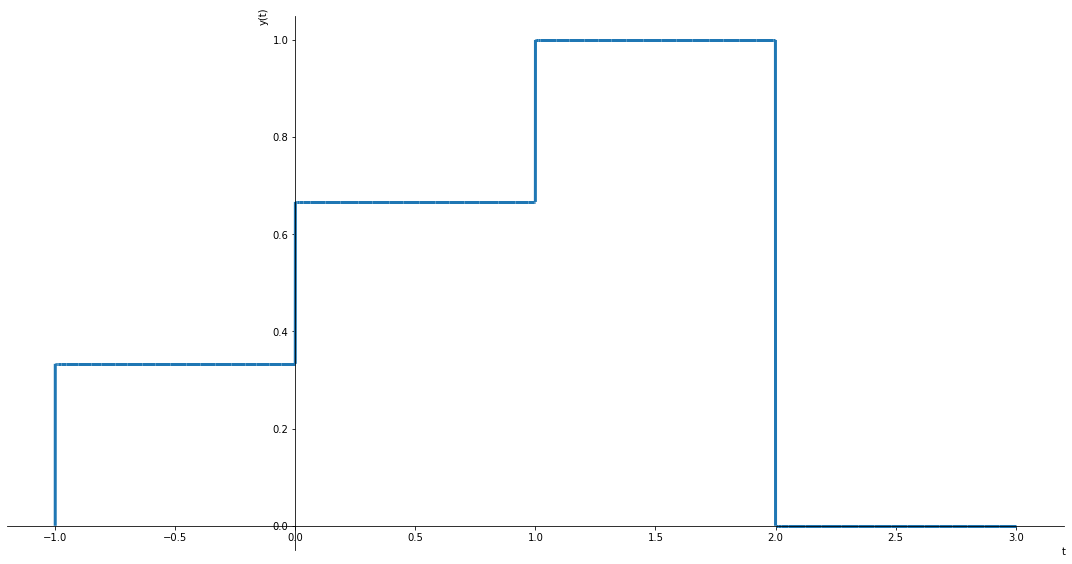

In [ ]:
p = plot(expr.subs(t, -t+2), (t, -1, 3), ylabel=r'y(t)')                        #Se realiza la gráfica

<p align = "center"><b>Tablero 7.7. </b> Señal escalera invertida y atrasada

### **7.1.4. Escalamiento temporal**

<p align = "justify">El escalamiento temporal de una señal $x(t)$ está definido como:

\begin{equation}
y(t) = x(a \cdot t) \tag{7.13}
\end{equation}

<p align = "justify">con $a \in \mathbb{R}$. La señal $x(t)$ es:

* expandida para $0 < a < 1$
* comprimida $a > 1$
* invertida y escalada para $a < 0$

<p align = "justify">Una aplicación de escalado temporal en el procesamiento de la señal es la escala de las señales estándar y el modelado del <a href = "https://en.wikipedia.org/wiki/Doppler_effect">Doppler effect</a>.

<p align = "justify"><b><h4>Ejemplo 7.9: <h4\></b>El siguiente ejemplo ilustra el escalamiento de una señal escalera $y(t) = x(a \cdot t)$, con $a = 3$ utilizando el modulo <i>Sympy</i>.

Código 7.8: escala y grafica la señal escalera.

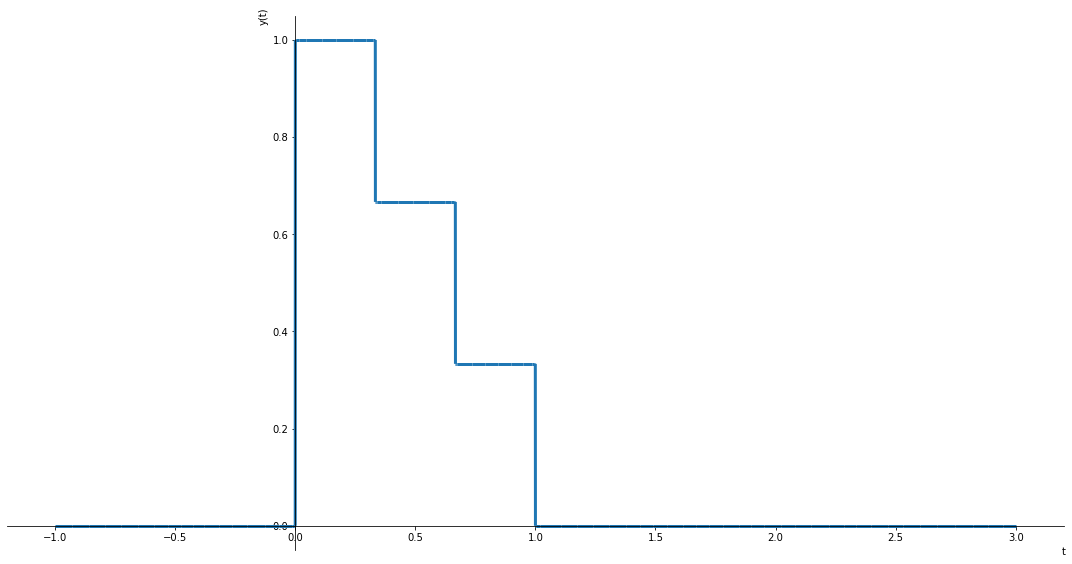

In [ ]:
p = plot(expr.subs(t, 3*t), (t, -1, 3), ylabel=r'y(t)')

<p align = "center"><b>Tablero 7.8. </b> Señal escalada

### **7.1.5. Escalamiento temporal o submuestreo de señales**

<p align = "justify">Consiste en la modificación del argumento $n$ por $a \cdot n$, donde $a \in \mathbb{Z}$

\begin{equation}
y(n) = x(a \cdot n) \tag{7.14}
\end{equation}

<p align = "justify"><b><h4>Ejemplo 7.10: <h4\></b>Dada la señal $x(n)$, hallar $y(n) =  x(2 \cdot n)$.

| x(n): |  0 | -2 |  0 |  2 |  2 | 2 | 3 | 4 | 5 | 0 | 0 | 0 | 0 |
|:-----:|:--:|:--:|:--:|:--:|:--:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|   n:  | -5 | -4 | -3 | -2 | -1 | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 |

<p align = "center"><b>Tabla 7.2. </b> Señal discreta ejemplo 7.10

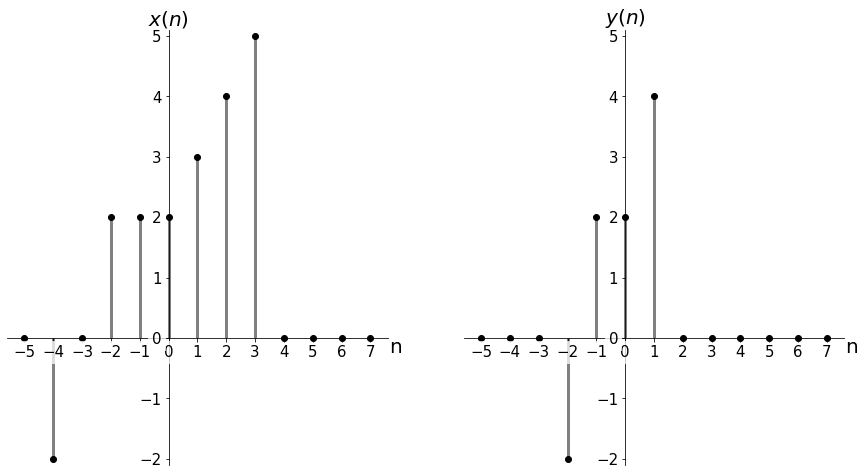

<p align = "center"><b>Figura 7.12. </b> Señal discreta escalada

<p align = "justify">Como se observa, $y(n)$ omitió las muestras impares de $x(n)$. Si la señal $x(n)$ se obtuvo muestreando una señal $x_a(n)$ a una frecuencia $1 / T_s$, donde $t$ toma el valor de $n \cdot T_s$, $x(t)$ discretizada es $x(n \cdot T_s)$. Ahora, cuando $x(n)$ se escala en 2 equivaldrá a una señal discretizada de la forma $x(2 \cdot n \cdot T_s)$ donde $2 \cdot T_s$ es el nuevo periodo de muestreo y la nueva $F_s = \frac{1}{2 \cdot T_s}$, disminuyó en un factor de 2.

De ejercicio se tiene lo siguiente:

$$
y(-2) = x(-4) = -2\\
y(-1) = x(-2) = 2\\
y(0) = x(0) = 2\\
y(1) = x(2) = 4\\
y(2) = x(4) = 0
$$

## **Ejercicios propuestos**

<p align = "justify"><b>Ejercicio 7.1: </b>Según el ejemplo 7.8, ¿para que valor de $\tau$ la señal comienza en $t=0$?

<p align = "justify"><b>Ejercicio 7.2: </b>Según el ejemplo 7.8, realice un cambio temporal dividiendo en dos operaciones consecutivas: (i) Inversión temporal y (ii) Desplazamiento temporal.

<p align = "justify"><b>Ejercicio 7.3: </b>Modifique el ejemplo 7.9 para que la señal se comprima cuántas unidades 10.

<p align = "justify"><b>Ejercicio 7.4: </b>Modifique el ejercicio anterior para que la señal se escale y se invierta. ¿Qué factor de escala $a$ da como resultado un       estiramiento/compresión en este contexto?  

**Copyright**

The notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebook for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Signals and Systems* by Sascha Spors.